<a href="https://colab.research.google.com/github/sonny2801/AI_CNN_LOPCHIEUT2/blob/main/Nhandientraicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/Nhandientraicay/Train_fruit'

In [4]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 174 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [5]:
train_dataset.classes
print(train_dataset.class_indices)

{'Trai cam': 0, 'Trai chuoi': 1, 'Trai dau': 2, 'Trai luu': 3, 'Trai man': 4, 'Trai mang cut': 5, 'Trai mit': 6, 'Trai oi': 7, 'Trai xoai': 8, 'dua hau': 9}


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [7]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
174/174 [==============================] - 80s 397ms/step - loss: 0.3911 - accuracy: 0.1264 - val_loss: 0.4499 - val_accuracy: 0.1000
Epoch 2/20
174/174 [==============================] - 4s 24ms/step - loss: 0.2829 - accuracy: 0.3161 - val_loss: 0.3355 - val_accuracy: 0.2750
Epoch 3/20
174/174 [==============================] - 4s 24ms/step - loss: 0.2022 - accuracy: 0.6437 - val_loss: 0.2895 - val_accuracy: 0.2250
Epoch 4/20
174/174 [==============================] - 4s 24ms/step - loss: 0.1479 - accuracy: 0.7989 - val_loss: 0.3150 - val_accuracy: 0.3500
Epoch 5/20
174/174 [==============================] - 4s 24ms/step - loss: 0.0974 - accuracy: 0.9195 - val_loss: 0.3883 - val_accuracy: 0.3250
Epoch 6/20
174/174 [==============================] - 4s 26ms/step - loss: 0.0756 - accuracy: 0.9655 - val_loss: 0.3634 - val_accuracy: 0.2750
Epoch 7/20
174/174 [==============================] - 4s 24ms/step - loss: 0.0481 - accuracy: 0.9943 - val_loss: 0.4002 - val_accuracy: 0.22

In [9]:
validation_dataset.labels

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9], dtype=int32)

Trai dau


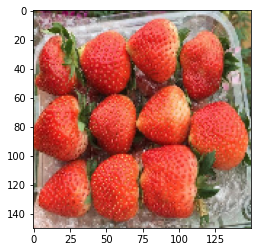

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Nhandientraicay/nhandien_fruit/dau.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("Trai cam ")
if(test==1):
    print("Trai chuoi")
if(test==2):
    print("Trai dau")
if(test==3):
    print("Trai luu")
if(test==4):
    print("Trai man")
if(test==5):
    print("Trai mang cut")
if(test==6):
    print("Trai mit")
if(test==7):
    print("Trai oi")
if(test==8):
    print("Trai xoai")
if(test==9):
    print("dua hau")

Trai man


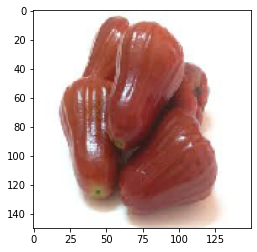

In [11]:
filename = "/content/drive/MyDrive/Nhandientraicay/nhandien_fruit/man1.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("Trai cam ")
if(test==1):
    print("Trai chuoi")
if(test==2):
    print("Trai dau")
if(test==3):
    print("Trai luu")
if(test==4):
    print("Trai man")
if(test==5):
    print("Trai mang cut")
if(test==6):
    print("Trai mit")
if(test==7):
    print("Trai oi")
if(test==8):
    print("Trai xoai")
if(test==9):
    print("dua hau")

Trai cam 


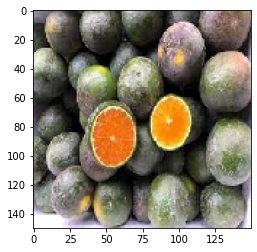

In [12]:
filename = "/content/drive/MyDrive/Nhandientraicay/nhandien_fruit/traicam.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("Trai cam ")
if(test==1):
    print("Trai chuoi")
if(test==2):
    print("Trai dau")
if(test==3):
    print("Trai luu")
if(test==4):
    print("Trai man")
if(test==5):
    print("Trai mang cut")
if(test==6):
    print("Trai mit")
if(test==7):
    print("Trai oi")
if(test==8):
    print("Trai xoai")
if(test==9):
    print("dua hau")